## Mini-Challenge: Querying and Plotting WILD Token Prices

In this mini-challenge, you’ll use the CoinGecko API to fetch price data for the WILD token and plot its price over time using the matplotlib library.

In [ ]:
import requests
import matplotlib.pyplot as plt
import datetime


In [ ]:
# Function to fetch the historical price of WILD in USD
def fetch_wild_price_data(num_days=10):
    url = f"https://api.coingecko.com/api/v3/coins/wilder-world/market_chart?vs_currency=usd&days={num_days}&interval=daily"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        return data['prices']
        
    else:
        print(f"Error: {response.status_code}")
        return None

    

In [ ]:
# Plot wild price against date. This function expects a dictionary with the dates as keys and price as values
def plot_wild_price(data):
    dates = list(data.keys())
    prices = list(data.values())
    
    plt.figure(figsize=(10, 6))
    plt.plot(dates, prices, marker='o')
    plt.title('WILD Price vs Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Convert a unix timestamp (in millisec) to datetime
def convert_unix_timestamp_to_datetime(timestamp):
    return datetime.datetime.fromtimestamp(timestamp/1000)

## Write a function that will plot the price of WILD for the last 20 days!

Some hints

- Coingecko returns price data as a list of lists like this:

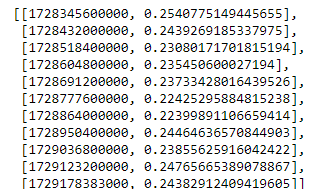

- The numbers on the left are unix timestamps. You need to convert them to datetime using the ``convert_unix_timestamp_to_datetime`` function
- You need to convert this data into a dictionary before passing this dictionary into ``plot_wild_price``
- Remember we need 20 days of price data, this is not the default if you call ``fetch_wild_price_data`` without any arguments

### Submission

Use your own GitHub account to submit, by creating a pull request to my repo with your changes.
First to submit a working pull request wins!

See this guide on how to do this
https://codex.so/fork-and-pull-en


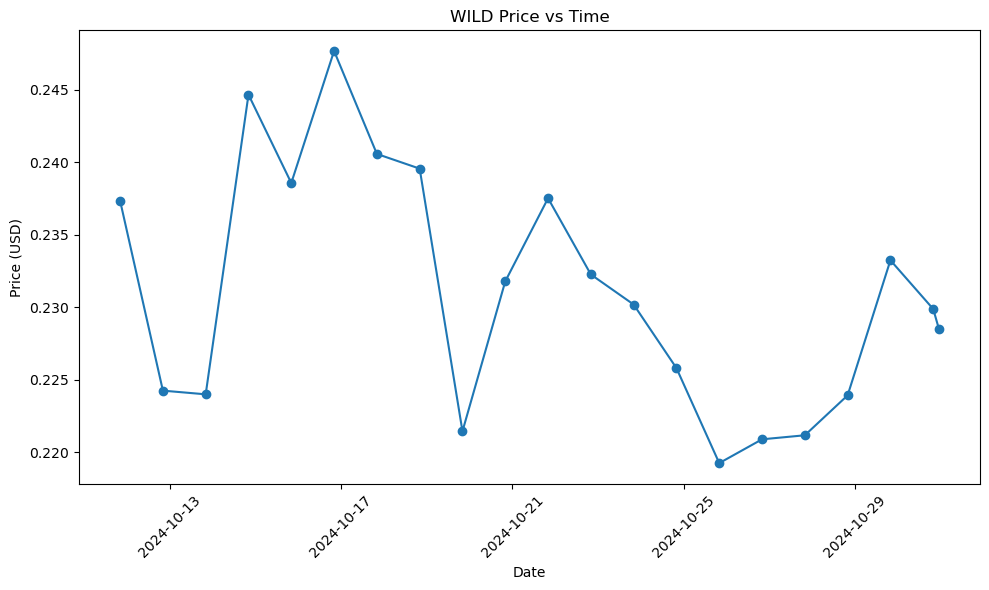

In [6]:
number_days = 20
price_data = fetch_wild_price_data(number_days) #not sure why the api seem to use a "zero base" index for number of days
wild_price_dict = {}
for data in price_data:
    wild_price_dict[convert_unix_timestamp_to_datetime(data[0])] = data[1]

#print(wild_price_dict)
plot_wild_price(wild_price_dict)